In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [4]:
DATADIR = "D:\datasets\petimages"
CATEGORIES = ["dogs","cats"]

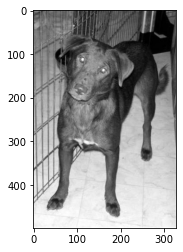

In [5]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [6]:

print(img_array)

[[227 156 121 ... 109 104 103]
 [237 158 113 ...  91  87  86]
 [233 152 107 ...  61  59  60]
 ...
 [255 253 249 ... 238 237 237]
 [255 254 251 ... 244 243 243]
 [255 255 253 ... 249 247 248]]


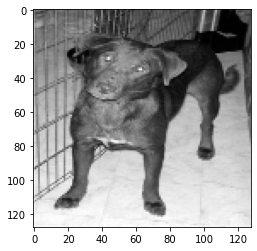

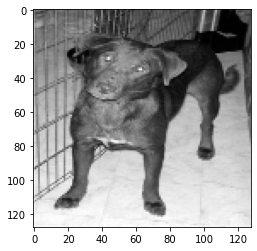

In [146]:
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
training_data = []

In [8]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

print(len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████| 4001/4001 [00:52<00:00, 76.94it/s]

8005


In [9]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

0
1
0
0
1
0
1
1
0
0
[[[[ 99]
   [109]
   [ 81]
   ...
   [ 72]
   [ 65]
   [ 73]]

  [[128]
   [ 82]
   [ 91]
   ...
   [ 66]
   [ 56]
   [ 66]]

  [[ 86]
   [109]
   [120]
   ...
   [ 63]
   [ 66]
   [ 52]]

  ...

  [[ 90]
   [ 90]
   [141]
   ...
   [ 90]
   [ 55]
   [ 74]]

  [[130]
   [132]
   [126]
   ...
   [ 72]
   [ 49]
   [ 74]]

  [[ 88]
   [155]
   [123]
   ...
   [ 51]
   [ 61]
   [ 74]]]]


In [148]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from keras.optimizers import SGD, Adam, RMSprop 
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)



In [111]:

y = np.array(y)
dense_layers = [0]
layer_sizes = [32]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

3-conv-32-nodes-0-dense-1593182170


In [112]:
 model = Sequential()
 model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
 model.add(Activation('relu'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Dropout(0.25))            
            
            
            
#model=Sequential()

#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

In [113]:
for l in range(conv_layer-1):
    model.add(Conv2D(layer_size, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

In [114]:
 model.add(Flatten())

In [115]:
for _ in range(dense_layer):
     model.add(Dense(layer_size))
     model.add(Activation('relu'))
     model.add(Dense(1))
     model.add(Activation('sigmoid'))

In [116]:
pip install tensorboard

In [117]:
  
    tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [121]:
BATCH_SIZE = 32
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.3
OPTIM = Adam()

In [123]:
#train the model

model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])


model.fit(X,y, batch_size= 32, epochs=NB_EPOCH, validation_split= VALIDATION_SPLIT, verbose= VERBOSE)



Train on 5603 samples, validate on 2402 samples
Epoch 1/20
5603/5603 [==============================] - 73s 13ms/sample - loss: 4.8520 - accuracy: 0.0153 - val_loss: 4.8520 - val_accuracy: 0.0154
Epoch 2/20
5603/5603 [==============================] - 65s 12ms/sample - loss: 4.8520 - accuracy: 0.0162 - val_loss: 4.8520 - val_accuracy: 0.0154
Epoch 3/20
5603/5603 [==============================] - 69s 12ms/sample - loss: 4.8520 - accuracy: 0.0130 - val_loss: 4.8520 - val_accuracy: 0.0154
Epoch 4/20
5603/5603 [==============================] - 67s 12ms/sample - loss: 4.8520 - accuracy: 0.0132 - val_loss: 4.8520 - val_accuracy: 0.0154
Epoch 5/20
5603/5603 [==============================] - 74s 13ms/sample - loss: 4.8520 - accuracy: 0.0143 - val_loss: 4.8520 - val_accuracy: 0.0154
Epoch 6/20
5603/5603 [==============================] - 73s 13ms/sample - loss: 4.8520 - accuracy: 0.0120 - val_loss: 4.8520 - val_accuracy: 0.0154
Epoch 7/20
5603/5603 [==============================] - 64s 11ms

In [124]:


model.save('Cat_vs_Dog-CNN.model')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Cat_vs_Dog-CNN.model\assets


In [104]:
#model.fit(X_train,Y_train, batch_size= BATCH_SIZE, epochs=NB_EPOCH, validation_split= VALIDATION_SPLIT, verbose= VERBOSE)
#score=model.evaluate(X_test,Y_test,batch_size= BATCH_SIZE,verbose= VERBOSE)

#print('Test Score:',score[0])
#print('Test accurancy:',score[1])

In [150]:
import cv2
import tensorflow as tf

CATEGORIES = ["dogs","cats"]


def prepare(filepath):
    IMG_SIZE = 128  # 30 in txt-based

    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model('Cat_vs_Dog-CNN.model')
import pandas as pd

